In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('https://query.data.world/s/vha3wyujw2famdzxa46zpep5gwdtym')

In [ ]:
df

,Unnamed: 0,date,price,level,levels,rooms,area,kitchen_area,geo_lat,geo_lon,building_type,object_type,postal_code,street_id,id_region,house_id
0,10501941,2021-12-01,5230000,1,20,3,78.0,30.0,55.023693,82.850766,0,0,630036.0,195854.0,54,794474.0
1,10501942,2021-12-01,3900000,10,15,-1,30.0,5.5,55.754272,38.057261,0,0,143921.0,301466.0,50,2272232.0
2,10501943,2021-12-01,4100000,3,15,1,39.4,13.0,57.152974,65.534410,2,2,625033.0,239624.0,72,2285569.0
3,10501944,2021-12-01,1300000,1,1,3,110.0,9.0,55.745676,37.673825,0,0,109544.0,NaN,22,NaN
4,10501945,2021-12-01,3500000,3,4,2,41.1,5.6,52.354946,104.219960,0,0,664020.0,NaN,38,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
856203,11358144,2021-12-31,6350000,3,5,3,85.0,12.0,53.331843,83.783791,0,0,656043.0,NaN,22,NaN
856204,11358145,2021-12-31,6099000,4,9,3,65.0,0.0,56.041539,92.753133,0,0,660030.0,581436.0,24,857003.0
856205,11358146,2021-12-31,2490000,1,10,2,56.9,0.0,55.169949,61.519210,0,0,454079.0,274414.0,74,1820769.0
856206,11358147,2021-12-31,850000,2,2,2,37.0,5.0,55.946206,43.088179,0,0,606101.0,190983.0,52,958329.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 856208 entries, 0 to 856207
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     856208 non-null  int64  
 1   date           856208 non-null  object 
 2   price          856208 non-null  int64  
 3   level          856208 non-null  int64  
 4   levels         856208 non-null  int64  
 5   rooms          856208 non-null  int64  
 6   area           856208 non-null  float64
 7   kitchen_area   856208 non-null  float64
 8   geo_lat        856208 non-null  float64
 9   geo_lon        856208 non-null  float64
 10  building_type  856208 non-null  int64  
 11  object_type    856208 non-null  int64  
 12  postal_code    815721 non-null  float64
 13  street_id      495512 non-null  float64
 14  id_region      856208 non-null  int64  
 15  house_id       562625 non-null  float64
dtypes: float64(7), int64(8), object(1)
memory usage: 104.5+ MB


In [ ]:
kazan = df[(df['id_region'] == 16) & (df['postal_code'] >= 420000) & (df['postal_code'] < 421000)]

In [ ]:
kazan = kazan.drop(['Unnamed: 0', 'date', 'geo_lat', 'geo_lon', 'house_id', 'building_type', 'street_id', 'id_region'], axis = 1)

In [ ]:
kazan

,price,level,levels,rooms,area,kitchen_area,object_type,postal_code
10,2470000,1,9,-1,18.00,-100.0,0,420126.0
11,2130000,1,9,-1,118.00,-100.0,0,420126.0
251,2500000,2,5,1,19.00,2.0,0,420032.0
252,2500000,3,3,1,20.80,4.2,0,420005.0
453,6700000,5,24,2,54.00,-100.0,2,420087.0
...,...,...,...,...,...,...,...,...
855702,9504342,3,10,3,73.62,0.0,2,420108.0
855864,7553000,1,17,2,46.27,0.0,2,420083.0
856095,4300000,3,5,2,45.60,6.1,0,420073.0
856183,4269999,4,19,1,37.50,10.6,0,420076.0


In [ ]:
kazan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12036 entries, 10 to 856198
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         12036 non-null  int64  
 1   level         12036 non-null  int64  
 2   levels        12036 non-null  int64  
 3   rooms         12036 non-null  int64  
 4   area          12036 non-null  float64
 5   kitchen_area  12036 non-null  float64
 6   object_type   12036 non-null  int64  
 7   postal_code   12036 non-null  float64
dtypes: float64(3), int64(5)
memory usage: 846.3 KB


In [ ]:
kazan.corr()['price']

price           1.000000
level           0.136756
levels          0.170419
rooms           0.482662
area            0.762711
kitchen_area    0.167074
object_type     0.092777
postal_code    -0.047847
Name: price, dtype: float64

# Визуализация

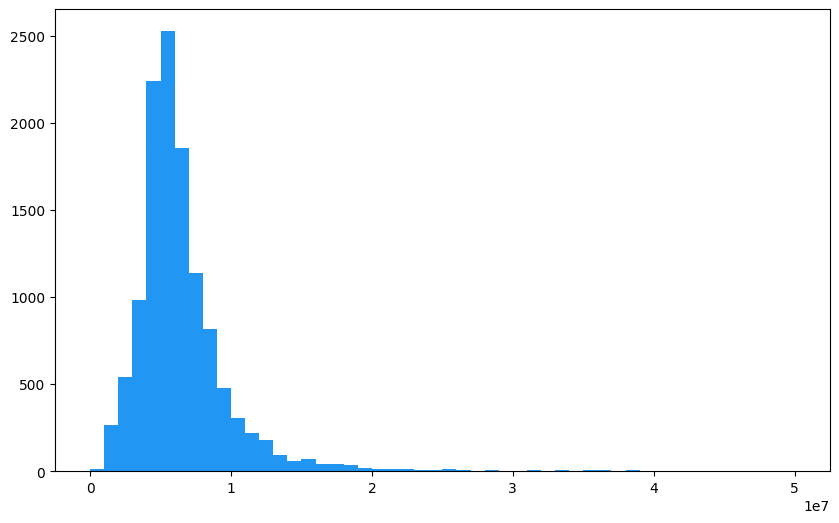

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(kazan['price'], range=[0, 50000000], bins=50, color='#2196f3')
plt.show()

In [ ]:
kazan = kazan[kazan['price'] < 14000000]

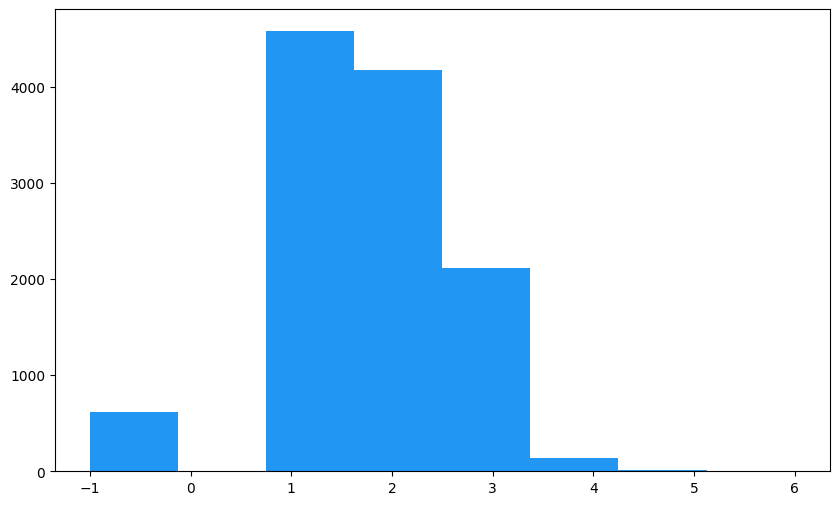

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(kazan['rooms'], bins=8, color='#2196f3')
plt.show()

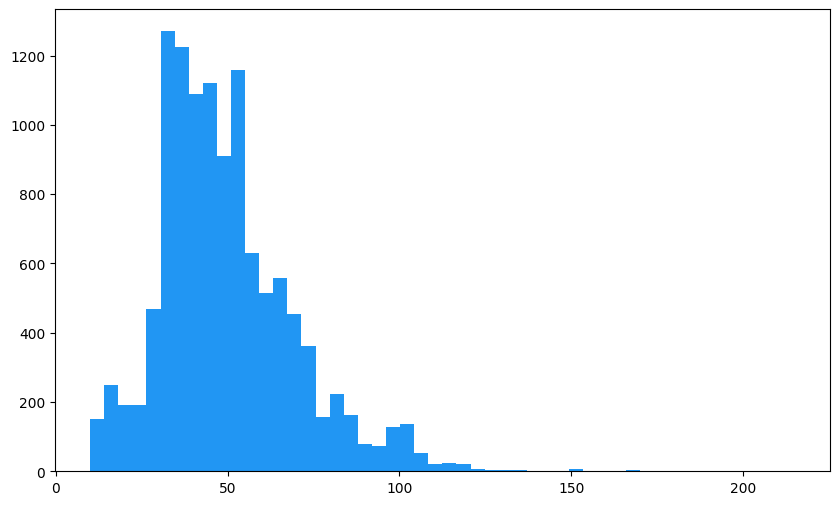

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(kazan['area'], bins=50, color='#2196f3')
plt.show()

In [ ]:
kazan = kazan[kazan['area'] < 140]

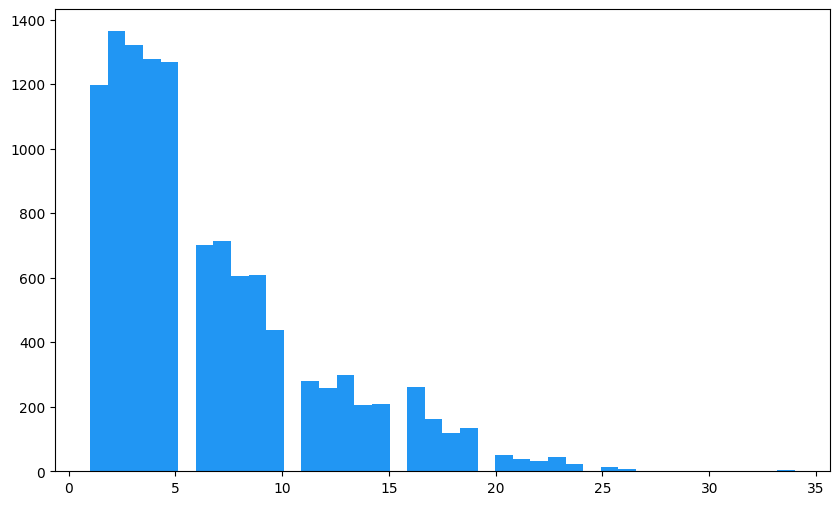

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(kazan['level'], bins=40, color='#2196f3')
plt.show()

# Обучение

In [ ]:
df = kazan.copy()

In [ ]:
one_hot = pd.get_dummies(df['postal_code'])
df = df.drop('postal_code', axis = 1)
df = df.join(one_hot)
df.shape

(11634, 84)

In [ ]:
df.columns = df.columns.astype(str)

In [ ]:
prices = df['price']
features = df.drop('price', axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(features, prices, test_size=0.2, random_state=10)


### SVM

In [ ]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
model_SVR = svm.SVR()
model_SVR.fit(X_train,Y_train)
Y_pred = model_SVR.predict(X_test)


print(f"Training data r-squared: {model_SVR.score(X_train, Y_train)}")
print(f"Test data r-squared: {model_SVR.score(X_test, Y_test)}")

Training data r-squared: -0.027375761812966415
Test data r-squared: -0.02332509529748461


### RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model_RFR = RandomForestRegressor(n_estimators=10)
model_RFR.fit(X_train, Y_train)

In [ ]:
from sklearn.metrics import mean_squared_error, median_absolute_error, r2_score
y_pred = list(model_RFR.predict(X_test))
y_true = list(Y_test)
RMSE = mean_squared_error(y_true, y_pred, squared=False)
R2 = r2_score(y_true, y_pred)
MAE = median_absolute_error(y_true, y_pred)

In [ ]:
print(f"R2: {R2}")
print(f"MAE: {MAE}")
print(f"RMSE: {RMSE}")

R2: 0.8354310178025535
MAE: 293000.0
RMSE: 929898.7777799002


### Catboost

In [ ]:
!pip install catboost

In [ ]:
from catboost import CatBoostRegressor
cb_model = CatBoostRegressor(learning_rate=0.5, custom_metric=['RMSE', 'MAE', 'R2'])
cb_model.fit(X_train, Y_train, eval_set=(X_test, Y_test))
cb_model.save_model("model")

In [ ]:
print(f"Training data r-squared: {cb_model.score(X_train, Y_train)}")
print(f"Test data r-squared: {cb_model.score(X_test, Y_test)}")

Training data r-squared: 0.9810613570697664
Test data r-squared: 0.8788845175739622


In [ ]:
cb_model.get_best_score()

{'learn': {'MAE': 223169.68169097317,
  'R2': 0.9810613570697664,
  'RMSE': 317745.2479095876},
 'validation': {'MAE': 505729.3557650555,
  'R2': 0.8788845175739622,
  'RMSE': 797740.2721474923}}

### LinearRegression

In [ ]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(X_train, Y_train)

In [ ]:
from sklearn.metrics import mean_squared_error, median_absolute_error, r2_score
y_pred = list(regr.predict(X_test))
y_true = list(Y_test)
RMSE = mean_squared_error(y_true, y_pred, squared=False)
R2 = r2_score(y_true, y_pred)
MAE = median_absolute_error(y_true, y_pred)

In [ ]:
print(f"R2: {R2}")
print(f"MAE: {MAE}")
print(f"RMSE: {RMSE}")

R2: 0.7194264629233006
MAE: 607849.9004647722
RMSE: 1214185.4908584424


# Нейронка

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
from keras import backend as K

def coeff_determination(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred))
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return (1 - SS_res/(SS_tot + K.epsilon()))


model = keras.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=[83]), # Входной слой
    keras.layers.Dense(512, activation='relu'), # Скрытый слой
    keras.layers.Dense(512, activation='relu'), # Скрытый слой
    keras.layers.Dense(1) # Выходной слой
])

model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.001), metrics=[coeff_determination])

history = model.fit(X_train, Y_train, epochs=300, batch_size=16, validation_data=(X_test, Y_test))

In [ ]:
y_pred = model.predict(X_test)
y_true = [[i] for i in Y_test]
R2 = model.evaluate(X_test, Y_test)[1]
mse = tf.keras.losses.MeanSquaredError()
RMSE = np.sqrt(mse(y_true, y_pred).numpy())
mae = tf.keras.losses.MeanAbsoluteError()
MAE = mae(y_true, y_pred).numpy()

In [ ]:
print(f"R2: {R2}")
print(f"MAE: {MAE}")
print(f"RMSE: {RMSE}")

R2: 0.8061218857765198
MAE: 635259.625
RMSE: 972505.8125


In [ ]:
# Catboost
# R2: 0.8788845175739622
# MAE: 505729.3557650555
# RMSE: 797740.2721474923

In [ ]:
# RandomForestRegressor
# R2: 0.8354310178025535
# MAE: 293000.0
# RMSE: 929898.7777799002

In [ ]:
# Neural network
# R2: 0.8061218857765198
# MAE: 635259.625
# RMSE: 972505.8125

In [ ]:
# LinearRegression
# R2: 0.7194264629233006
# MAE: 607849.9004647722
# RMSE: 1214185.4908584424

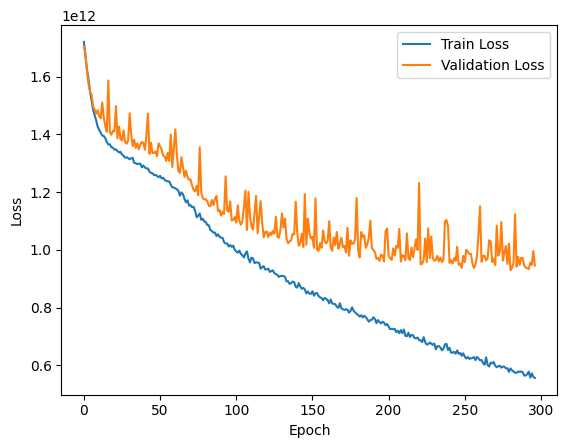

In [ ]:
import matplotlib.pyplot as plt

plt.plot( history.history['loss'][3:], label='Train Loss')
plt.plot(history.history['val_loss'][3:], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

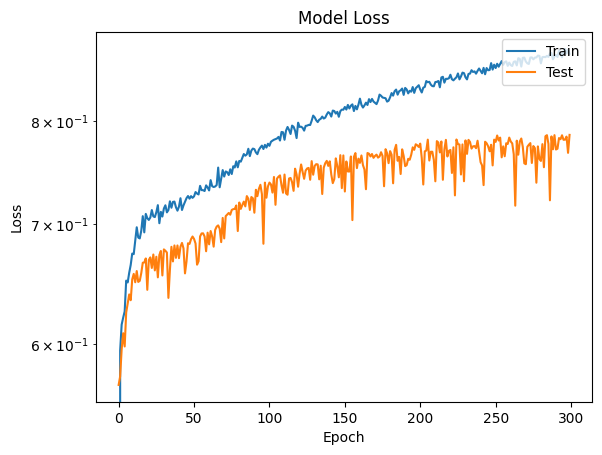

In [ ]:
plt.semilogy(history.history['coeff_determination'])
plt.semilogy(history.history['val_coeff_determination'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# Влияние года постройки дома на стоимость квартиры

In [ ]:
!pip install requests

In [ ]:
import json

In [ ]:
with open('/content/pred_data.txt', 'r') as file:
  data_arr = list(json.loads(file.read()))

In [ ]:
with open('/content/years.txt', 'r') as file:
  years_arr = list(json.loads(file.read()))

In [ ]:
with open('/content/real_price.txt', 'r') as file:
  real_price_arr = list(json.loads(file.read()))

In [ ]:
dp = list(cb_model.predict(data_arr))

In [ ]:
df = pd.DataFrame(columns=['year', 'percent'])

In [ ]:
for i in range(len(data_arr)):
  df.loc[len(df)] = [years_arr[i], ((real_price_arr[i]-dp[i]) / dp[i]) * 100]

In [ ]:
df.shape

(3769, 2)

In [ ]:
df = df.groupby(['year']).mean()

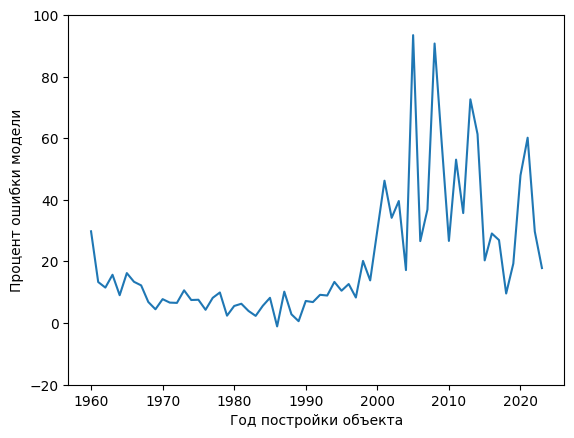

In [ ]:
import matplotlib.pyplot as plt

plt.plot(list(df.index.values), list(df.percent.values))
plt.ylim([-20, 100])
plt.xlabel('Год постройки объекта')
plt.ylabel('Процент ошибки модели')
plt.show()
# График показывающий на сколько процентов нужно изменить предсказанное значение

In [ ]:
d = dict()
for year, row in df.iterrows():
    if (int(year) - 1980) <= 0:
      coef = 1 + abs(int(year) - 1980) * 0.75 / 100
    else:
      if int(year) in range(2000, 2015):
        coef = 1.1 + abs(int(year) - 1980) / 100
      else:
        coef = 1 + abs(int(year) - 1980) * 0.55 / 100


    d.update({int(year): coef})

In [ ]:
df = pd.DataFrame(columns=['year', 'percent'])

In [ ]:
for i in range(len(data_arr)):
  predicted_price = dp[i] * d.get(int(years_arr[i]))
  df.loc[len(df)] = [years_arr[i], ((real_price_arr[i]-predicted_price) / predicted_price) * 100]

In [ ]:
df = df.groupby(['year']).mean()

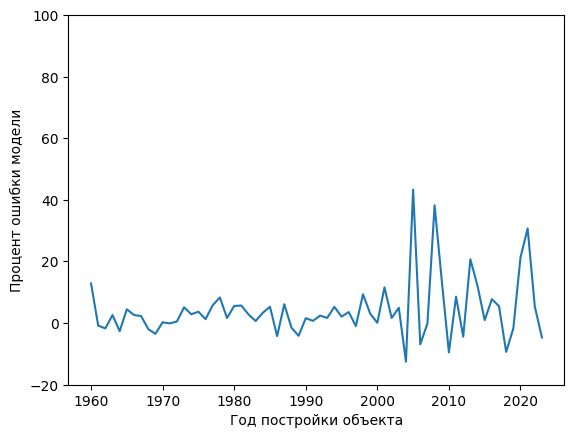

In [ ]:
import matplotlib.pyplot as plt

plt.plot(list(df.index.values), list(df.percent.values))
plt.ylim([-20, 100])
plt.xlabel('Год постройки объекта')
plt.ylabel('Процент ошибки модели')
plt.show()